In [254]:
import Fracbrow as fra
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

data=pd.read_csv('/Users/hugo/Desktop/ei/RealizedVarianceData.csv')["Realized Variance (5-minute)"].tolist()[1:]

l=[fra.pred_sigma(data[:k]) for k in range (len(data))]
F = pd.Series(l)

### Calculation of the correlation between the rough volatility estimator and the true volatility

In [255]:
#preparation of the data and filtering of the NaN values

a=pd.read_csv("RealizedVarianceData.csv",skiprows=[0])
d=a["SPX2.rv"].tolist()
for k in range(len(d)):
    if str(d[k])=="nan":
        d[k]=d[k-1]

true_volatility = pd.Series(d)

true_variance = true_volatility.var()

print("Correlation with True Volatility:\n", pd.Series(F).corr(true_volatility))

Correlation with True Volatility:
 0.4085170190580262


### Calculation and plotting of the monthly MSE for the rough volatility estimator

[*********************100%%**********************]  1 of 1 completed

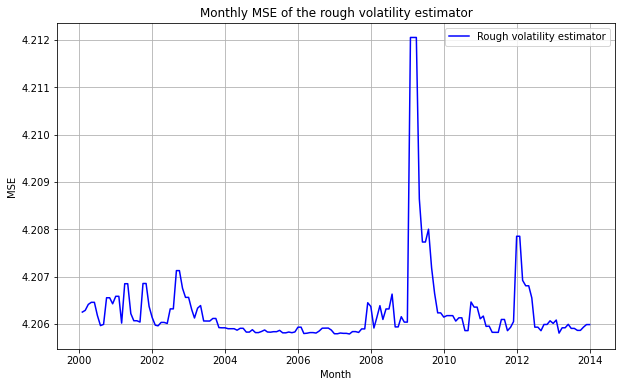

In [256]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

#preparation of the data and filtering of the NaN values
for k in range(len(l)):
    if str(l[k])=="nan":
        l[k]=l[k-1]

data = yf.download('SPY', start='2000-01-01', end='2014-01-01')
data.index = pd.to_datetime(data.index)

data['Frac'] = pd.Series(l).tolist()[:3521]

data['True_Volatility'] = pd.Series([0]+d).tolist()[:3521]
monthly_true_volatility = data['True_Volatility'].resample('M').mean()

def calculate_monthly_mse(estimator, true_volatility):
    return ((estimator - true_volatility) ** 2).resample('M').mean()

monthly_mse=calculate_monthly_mse(data['Frac'], monthly_true_volatility)

plt.figure(figsize=(10, 6))
plt.plot(monthly_mse.index.tolist(), monthly_mse.fillna(method='bfill').tolist(), label='Rough volatility estimator', color='blue')
plt.title('Monthly MSE of the rough volatility estimator')
plt.xlabel('Month')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()



### Plotting of the MSE distribution of the rough volatility estimator

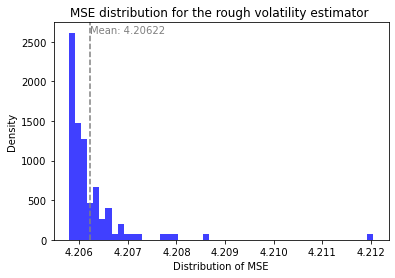

In [260]:
import matplotlib.pyplot as plt
import numpy as np

liste = monthly_mse.dropna().tolist()

mean_mse = np.mean(liste) 

density, bins, _ = plt.hist(liste, bins=50, alpha=0.75, color='blue', density=True)
plt.xlabel(f'Distribution of MSE')
plt.ylabel('Density')
plt.axvline(x=mean_mse, color='gray', linestyle='--')
plt.text(mean_mse, plt.ylim()[1] * 0.95, f'Mean: {mean_mse:.5f}', color='gray', ha='left')
plt.title(f'MSE distribution for the rough volatility estimator ')
plt.show()

### Plotting of the variance distribution of the rough volatility estimator

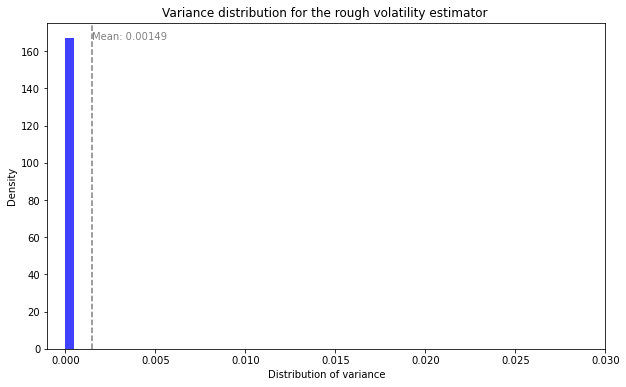

In [262]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_monthly_var(estimator):
    return estimator.resample('M').var()

monthly_var=calculate_monthly_var(data['Frac'])
liste = monthly_var.dropna().tolist()
mean_var = np.mean(liste) 
    
plt.figure(figsize=(10, 6))
density, bins, _ = plt.hist(liste, bins=500, alpha=0.75, color='blue')
plt.xlabel(f'Distribution of variance')
plt.ylabel('Density')
plt.axvline(x=mean_var, color='gray', linestyle='--')
plt.text(mean_var, plt.ylim()[1] * 0.95, f'Mean: {mean_var:.5f}', color='gray', ha='left')
plt.title(f'Variance distribution for the rough volatility estimator ')
plt.xlim([-0.001,0.03])
plt.show()

### Plotting of the bias distribution of the rough volatility estimator

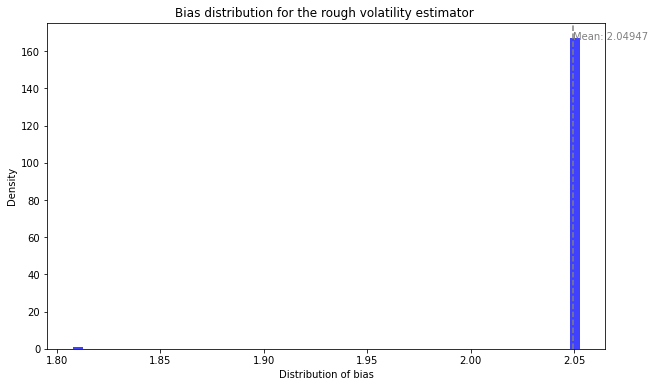

In [259]:
def calculate_monthly_mean(estimateur):
    return estimateur.resample('M').mean()

def calculate_monthly_bias(estimator, true_volatility):
    return (true_volatility-calculate_monthly_mean(estimator))

monthly_bias=calculate_monthly_bias(data['Frac'], monthly_true_volatility)
liste=monthly_bias.tolist()
mean_bias = np.mean(liste) 
    
plt.figure(figsize=(10, 6))
density, bins, _ = plt.hist(liste, bins=50, alpha=0.75, color='blue')
plt.xlabel(f'Distribution of bias')
plt.ylabel('Density')
plt.title(f'Bias distribution for the rough volatility estimator ')
plt.axvline(x=mean_bias, color='gray', linestyle='--')
plt.text(mean_bias, plt.ylim()[1] * 0.95, f'Mean: {mean_bias:.5f}', color='gray', ha='left')
plt.show()